<a href="https://colab.research.google.com/github/rahuls321/Time-Series-Forecasting-With-Python/blob/master/Check_if_Time_Series_Data_is_Stationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Stationary Time Series

Time series are called stationary if they don't have any trend or seasonality effects. Statistical operations like mean or variance will be consistent over time.

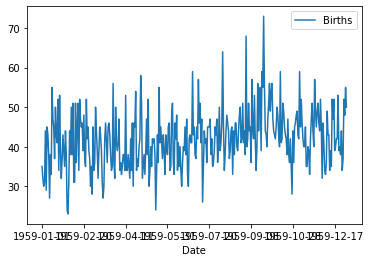

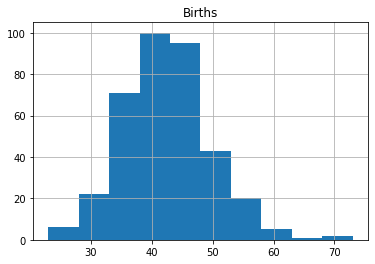

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [37]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('gdrive/My Drive/Colab Notebooks/Forecasting_Datasets/daily-total-female-births.csv', header=0, index_col=0)
series.plot()
series.hist()
pyplot.show()

series.describe()

###Summary Statistics


In [38]:
X = series.values
split = round(len(X) / 2)
X1, X2 = X[:split], X[split:]
X1_mean, X2_mean = X1.mean(), X2.mean()
X1_var, X2_var = X1.var(), X2.var()
print("mean of both durations are %f, %f" %(X1_mean, X2_mean))
print("var of both durations are %f, %f" %(X1_var, X2_var))

mean of both durations are 39.763736, 44.185792
var of both durations are 49.213410, 48.708651


###Statistical Tests

In [48]:
from statsmodels.tsa.stattools import adfuller
X=series.iloc[:,0].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


The more negative ADF statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

##Non-Stationary Time Series

This kind of time series contain trends or seasonal effects or other structure that depends on time index. Mean or variance changes over time. 

Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and removing seasonal effects.

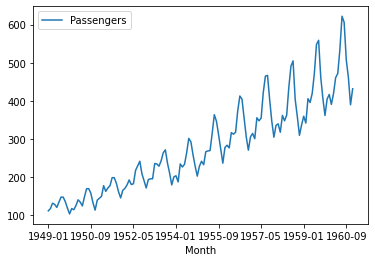

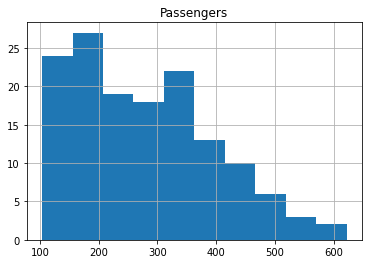

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [49]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('gdrive/My Drive/Colab Notebooks/Forecasting_Datasets/airline-passengers.csv', header=0, index_col=0)
series.plot()
series.hist()
pyplot.show()

series.describe()

###Summary Statistics


In [50]:
X = series.values
split = round(len(X) / 2)
X1, X2 = X[:split], X[split:]
X1_mean, X2_mean = X1.mean(), X2.mean()
X1_var, X2_var = X1.var(), X2.var()
print("mean of both durations are %f, %f" %(X1_mean, X2_mean))
print("var of both durations are %f, %f" %(X1_var, X2_var))

mean of both durations are 182.902778, 377.694444
var of both durations are 2244.087770, 7367.962191


###Statistical Tests

In [51]:
from statsmodels.tsa.stattools import adfuller
X=series.iloc[:,0].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.

####LogTransform

mean of both durations are 5.175146, 5.909206
var of both durations are 0.068375, 0.049264


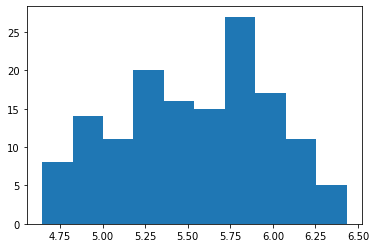

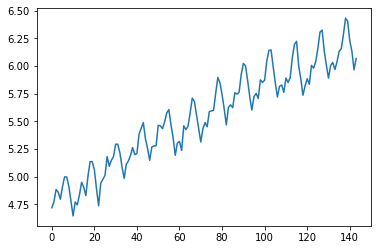

In [52]:
from numpy import log
X_log = log(X)
split = round(len(X_log) / 2)
X1, X2 = X_log[0:split], X_log[split:]
X1_mean, X2_mean = X1.mean(), X2.mean()
X1_var, X2_var = X1.var(), X2.var()
print("mean of both durations are %f, %f" %(X1_mean, X2_mean))
print("var of both durations are %f, %f" %(X1_var, X2_var))
pyplot.hist(X_log)
pyplot.show()
pyplot.plot(X_log)
pyplot.show()

From the statistics above, you can clearly says that mean and variance are constants over time but this fails in the line plot. As in the line plot seasonality is still present. Now here comes one tests in order to check stationarity i.e Statistical test aka Augmented Dickey-Fuller Test.

###Statistical Tests

In [56]:
from statsmodels.tsa.stattools import adfuller
X=series.iloc[:,0].values
X=log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


We can see that the value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.